# Long Audio Classification

Let say you want to classify long audio using TorchAudio, malaya-speech able to do that.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/long-audio-classification-torchaudio](https://github.com/huseinzol05/malaya-speech/tree/master/example/long-audio-classification-torchaudio).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
import malaya_speech
from malaya_speech import Pipeline
from malaya_speech.utils.astype import float_to_int

`pyaudio` is not available, `malaya_speech.streaming.pyaudio` is not able to use.


### Load VAD model

We are going to use WebRTC VAD model, read more about VAD at https://malaya-speech.readthedocs.io/en/latest/load-vad.html

In [3]:
vad_model = malaya_speech.vad.webrtc()

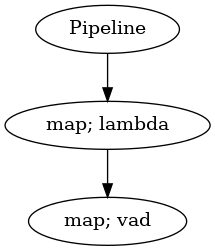

In [4]:
p_vad = Pipeline()
pipeline = (
    p_vad.map(lambda x: float_to_int(x, divide_max_abs=False))
    .map(vad_model)
)
p_vad.visualize()

Starting malaya-speech 1.4.0, streaming always returned a float32 array between -1 and +1 values.

### Streaming interface

```python
def stream(
    src,
    vad_model=None,
    asr_model=None,
    classification_model=None,
    format=None,
    option=None,
    buffer_size: int = 4096,
    sample_rate: int = 16000,
    segment_length: int = 2560,
    num_padding_frames: int = 20,
    ratio: float = 0.75,
    min_length: float = 0.1,
    max_length: float = 10.0,
    realtime_print: bool = True,
    **kwargs,
):
    """
    Stream an audio using torchaudio library.

    Parameters
    ----------
    vad_model: object, optional (default=None)
        vad model / pipeline.
    asr_model: object, optional (default=None)
        ASR model / pipeline, will transcribe each subsamples realtime.
    classification_model: object, optional (default=None)
        classification pipeline, will classify each subsamples realtime.
    format: str, optional (default=None)
        Supported `format` for `torchaudio.io.StreamReader`,
        https://pytorch.org/audio/stable/generated/torchaudio.io.StreamReader.html#torchaudio.io.StreamReader
    option: dict, optional (default=None)
        Supported `option` for `torchaudio.io.StreamReader`,
        https://pytorch.org/audio/stable/generated/torchaudio.io.StreamReader.html#torchaudio.io.StreamReader
    buffer_size: int, optional (default=4096)
        Supported `buffer_size` for `torchaudio.io.StreamReader`, buffer size in byte. Used only when src is file-like object,
        https://pytorch.org/audio/stable/generated/torchaudio.io.StreamReader.html#torchaudio.io.StreamReader
    sample_rate: int, optional (default = 16000)
        output sample rate.
    segment_length: int, optional (default=2560)
        usually derived from asr_model.segment_length * asr_model.hop_length,
        size of audio chunks, actual size in term of second is `segment_length` / `sample_rate`.
    num_padding_frames: int, optional (default=20)
        size of acceptable padding frames for queue.
    ratio: float, optional (default = 0.75)
        if 75% of the queue is positive, assumed it is a voice activity.
    min_length: float, optional (default=0.1)
        minimum length (second) to accept a subsample.
    max_length: float, optional (default=10.0)
        maximum length (second) to accept a subsample.
    realtime_print: bool, optional (default=True)
        Will print results for ASR.
    **kwargs: vector argument
        vector argument pass to malaya_speech.streaming.pyaudio.Audio interface.

    Returns
    -------
    result : List[dict]
    """
```

### Load ASR model

In [5]:
malaya_speech.stt.transducer.available_pt_transformer()

,Size (MB),malay-malaya,malay-fleur102,Language,singlish
mesolitica/conformer-tiny,38.5,"{'WER': 0.17341180814, 'CER': 0.05957485024}","{'WER': 0.19524478979, 'CER': 0.0830808938}",[malay],NaN
mesolitica/conformer-base,121,"{'WER': 0.122076123261, 'CER': 0.03879606324}","{'WER': 0.1326737206665, 'CER': 0.05032914857}",[malay],NaN
mesolitica/conformer-medium,243,"{'WER': 0.11723275992, 'CER': 0.03398158434893}","{'WER': 0.12977366262, 'CER': 0.048497925111}",[malay],NaN
mesolitica/emformer-base,162,"{'WER': 0.175762423786, 'CER': 0.06233919000537}","{'WER': 0.18303839134, 'CER': 0.0773853362}",[malay],NaN
mesolitica/conformer-singlish,121,NaN,NaN,[singlish],"{'WER': 0.08535878149, 'CER': 0.0452357273822,..."
mesolitica/conformer-medium-mixed,243,"{'WER': 0.122076123261, 'CER': 0.03879606324}","{'WER': 0.1326737206665, 'CER': 0.05032914857}","[malay, singlish]","{'WER': 0.08535878149, 'CER': 0.0452357273822,..."


In [6]:
model = malaya_speech.stt.transducer.pt_transformer(model = 'mesolitica/conformer-base')

In [7]:
_ = model.eval()

### ASR Pipeline

Feel free to add speech enhancement or any function, but in this example, I just keep it simple.

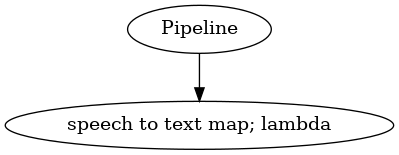

In [8]:
p_asr = Pipeline()
pipeline_asr = (
    p_asr.map(lambda x: model.beam_decoder([x])[0], name = 'speech-to-text')
)
p_asr.visualize()

**You need to make sure the last output should named as `speech-to-text` or else the streaming interface will throw an error**.

### Load Classification models

In this example, I am going to use 3 different modules, gender detection, language detection and age detection.

In [17]:
gender_model = malaya_speech.gender.deep_model(model = 'vggvox-v2')
language_detection_model = malaya_speech.language_detection.deep_model(model = 'vggvox-v2')
age_model = malaya_speech.age_detection.deep_model(model = 'vggvox-v2')

### Classification Pipeline

In this example, I just keep it simple. **And needs to end with `classification` map or else the streaming interface will throw an error**.

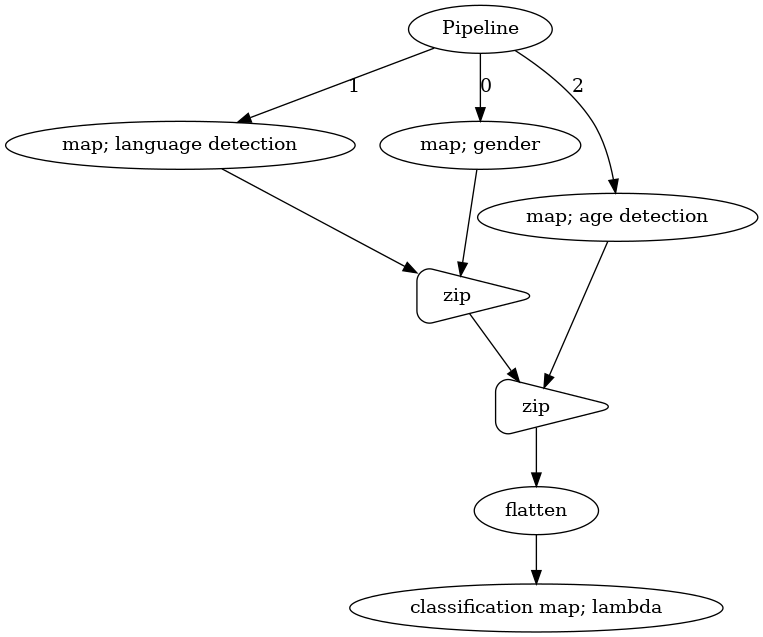

In [10]:
p_classification = Pipeline()
to_float = p_classification
gender = to_float.map(gender_model)
language_detection = to_float.map(language_detection_model)
age_detection = to_float.map(age_model)
combined = gender.zip(language_detection).zip(age_detection).flatten()
combined.map(lambda x: x, name = 'classification')

p_classification.visualize()

### Start streaming

In [12]:
samples = malaya_speech.streaming.torchaudio.stream('speech/podcast/2x5%20Ep%2010.wav',
                                                    vad_model = p_vad, 
                                                    asr_model = p_asr,
                                                    classification_model = p_classification,
                                                    segment_length = 320)

luangkan waktu untuk ikutilah drama tikus ini apabila pangkat menjadi taruhan berapa jabatan pun bermula siapa antara mereka yang (['female', 'malay', 'teens']) berjaya dan siapa pula yang tak ke mana mana dua kali sebagai amanah dalam dua kali (['female', 'malay', 'teens']) episod lepas rashid (['female', 'malay', 'twenties']) jalan seperti botol yang berlubang kita tanya sebab aku banyak kebaikan dan pengetahuannya kita tua dia akan berlalu dengan sia sia (['female', 'others', 'fifties']) tak boleh macam ni (['female', 'malay', 'teens']) ini simple sangat kalau boleh aku nak nampak gempak depan datuk arif tak boleh buat macam ni masuk (['male', 'malay', 'teens'])  (['male', 'others', 'fifties'])  (['male', 'malay', 'teens']) aku nak tanya ni kau buat apa ni taip kenapa simpan sangat (['male', 'malay', 'teens']) aku macam ni simpati padat ini kerja orang pemalas ambil kau aku nak kau tak balik ke ya aku nak proposal (['male', 'malay', 'teens']) nampak gempak gempak bogel ada bas eh ap

In [13]:
len(samples)

26

In [14]:
import IPython.display as ipd
import numpy as np

In [15]:
samples[4]

{'wav_data': array([0.01577759, 0.01583862, 0.01895142, ..., 0.01202393, 0.01086426,
        0.0057373 ], dtype=float32),
 'timestamp': datetime.datetime(2023, 2, 17, 1, 32, 19, 765981),
 'asr_model': 'tak boleh macam ni',
 'classification_model': ['female', 'malay', 'teens']}

In [16]:
ipd.Audio(samples[4]['wav_data'], rate = 16000)